In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Importing Required Libraries: 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [42]:
df= pd.read_csv('sent_resultt.csv')
df

,Positive,Negative,Neutral,Compound,Sent_result,Sentiment,Review,Index
0,0.000,0.00,1.000,0.0000,1,Neutral,CrystalChat: Visualizing Personal Chat History...,0
1,0.082,0.06,0.858,0.1280,0,Positive,"However, this awareness is largely built on pe...",1
2,0.000,0.00,1.000,0.0000,1,Neutral,Through visualization we explore social and te...,2
3,0.000,0.00,1.000,0.0000,1,Neutral,CrystalChat visualizes personal chat history.,3
4,0.000,0.00,1.000,0.0000,1,Neutral,Rather than showing online social networks tha...,4
...,...,...,...,...,...,...,...,...
6951,0.000,0.00,1.000,0.0000,1,Neutral,Comparing Fig.,6951
6952,0.000,0.00,1.000,0.0000,1,Neutral,"9 (b) and (c), the distribution edges in Fig.",6952
6953,0.290,0.00,0.710,0.4336,0,Positive,9 (c) is more even and clear than Fig.,6953
6954,0.000,0.00,1.000,0.0000,1,Neutral,9 (b)'s.,6954


In [43]:
df.describe()

,Positive,Negative,Neutral,Compound,Sent_result,Index
count,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000
mean,0.059231,0.017403,0.904245,0.114678,0.731455,3477.500000
std,0.091633,0.052888,0.164752,0.273639,0.604840,2008.168569
min,0.000000,0.000000,0.000000,-0.949800,0.000000,0.000000
25%,0.000000,0.000000,0.855000,0.000000,0.000000,1738.750000
50%,0.000000,0.000000,1.000000,0.000000,1.000000,3477.500000
75%,0.111000,0.000000,1.000000,0.318200,1.000000,5216.250000
max,1.000000,0.470000,1.000000,0.965700,2.000000,6955.000000


In [44]:
# data type:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6956 entries, 0 to 6955
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Positive     6956 non-null   float64
 1   Negative     6956 non-null   float64
 2   Neutral      6956 non-null   float64
 3   Compound     6956 non-null   float64
 4   Sent_result  6956 non-null   int64  
 5   Sentiment    6956 non-null   object 
 6   Review       6956 non-null   object 
 7   Index        6956 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 434.9+ KB


In [46]:
# Check the balance of outcome feature: 
#0= Positive, 1= Neutral, 2= Negative
df['Sent_result'].value_counts()

1    3910
0    2457
2     589
Name: Sent_result, dtype: int64

In [47]:
#split dataset in features and target variable:
X= df.iloc[:,:4] #feature
y=df['Sent_result'] # target

In [48]:
X

,Positive,Negative,Neutral,Compound
0,0.000,0.00,1.000,0.0000
1,0.082,0.06,0.858,0.1280
2,0.000,0.00,1.000,0.0000
3,0.000,0.00,1.000,0.0000
4,0.000,0.00,1.000,0.0000
...,...,...,...,...
6951,0.000,0.00,1.000,0.0000
6952,0.000,0.00,1.000,0.0000
6953,0.290,0.00,0.710,0.4336
6954,0.000,0.00,1.000,0.0000


In [49]:
#0= Positive, 1= Neutral, 2= Negative
y

0       1
1       0
2       1
3       1
4       1
       ..
6951    1
6952    1
6953    0
6954    1
6955    1
Name: Sent_result, Length: 6956, dtype: int64

In [50]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state= 3)

In [51]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5564, 4) (5564,)
(1392, 4) (1392,)


In [52]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [53]:
# Model Accuracy, how often is the classifier correct?
accuracy_score= metrics.accuracy_score(y_test, y_pred)
print('accuracy score is', str('{:04.2f}'.format(accuracy_score*100))+'%')

accuracy score is 100.00%


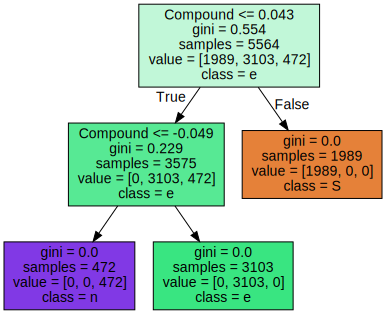

In [54]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=['Positive', 'Negative', 'Neutral', 'Compound'],  
                                class_names='Sent_result',
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph